# Qiskit 스터디 1-12주차 일정

## Week 2: 양자 알고리즘 기초
### 문제 1: "변형된 Deutsch 문제"
```python
# 다음 함수들이 상수인지 균형인지 판별하세요:
# f1(x) = x AND 1
# f2(x) = x XOR 1
# f3(x) = NOT(x OR 1)

# 요구사항:
# 1. 각 함수에 대한 양자 오라클 구현
# 2. 단 한 번의 함수 호출로 판별 수행
# 3. 각 함수에 대해 다음 검증:
#    - 고전적 진리표 작성
#    - 양자 회로 구현
#    - 결과의 확률 분포 시각화
```

In [58]:
# useful additional packages 
import numpy as np
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [45]:
print("x f1(x) = x AND 1")
for i in range(2):
    print(i, i&1)

x f1(x) = x AND 1
0 0
1 1


In [46]:
print("Truth Table")
for i in range(2):
    for j in range(2):
        y = i & 1
        print(i, j, '|', i, j^y)

Truth Table
0 0 | 0 0
0 1 | 0 1
1 0 | 1 1
1 1 | 1 0


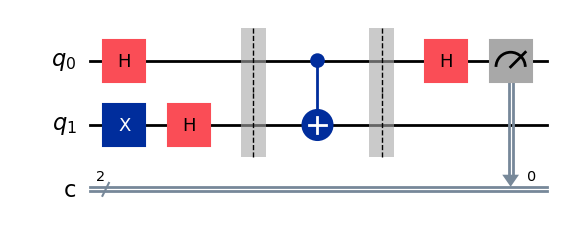

In [59]:
def oracle_f1(circuit, x, y):
    circuit.cx(x, y)

djCircuit = QuantumCircuit(2, 2)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
djCircuit.h(0)

# Flip the second register and apply the Hadamard gate.
djCircuit.x(1)
djCircuit.h(1)
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

oracle_f1(djCircuit, 0, 1)
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

djCircuit.h(0)

# Measurement
djCircuit.measure(0, 0)
djCircuit.draw('mpl')

f(x) is balanced


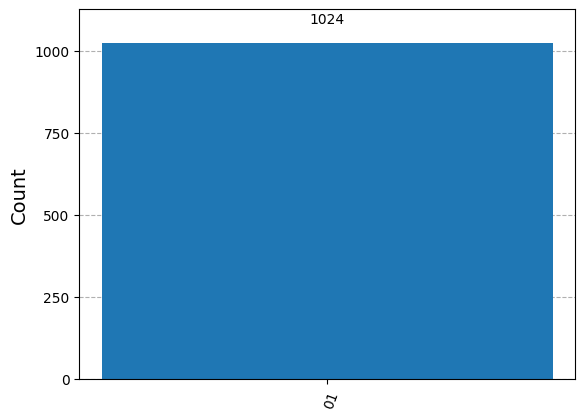

In [60]:
simulator = QasmSimulator()

compiled_circuit = transpile(djCircuit, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts()
if list(counts.keys())[0] == '00':
    print("f(x) is constant")
else:
    print("f(x) is balanced")
plot_histogram(counts)

In [49]:
print("x f1(x) = x XOR 1")
for i in range(2):
    print(i, i^1)

x f1(x) = x XOR 1
0 1
1 0


In [50]:
print("Truth Table")
for i in range(2):
    for j in range(2):
        y = i ^ 1
        print(i, j, '|', i, j^y)

Truth Table
0 0 | 0 1
0 1 | 0 0
1 0 | 1 0
1 1 | 1 1


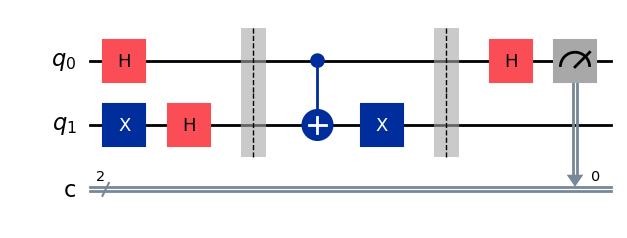

In [61]:
def oracle_f2(circuit, x, y):
    circuit.cx(x, y)
    circuit.x(y)

djCircuit = QuantumCircuit(2, 2)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
djCircuit.h(0)

# Flip the second register and apply the Hadamard gate.
djCircuit.x(1)
djCircuit.h(1)
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

oracle_f2(djCircuit, 0, 1)
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

djCircuit.h(0)

# Measurement
djCircuit.measure(0, 0)
djCircuit.draw('mpl')

f(x) is balanced


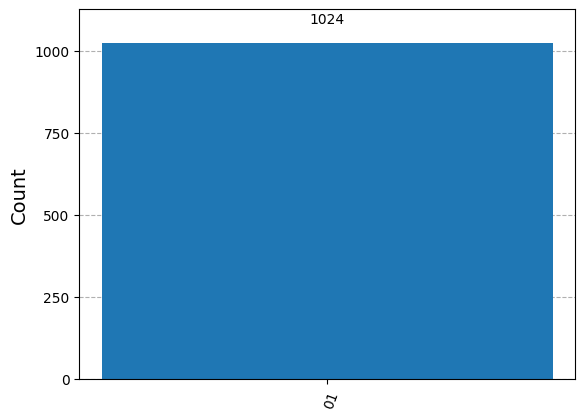

In [62]:
simulator = QasmSimulator()

compiled_circuit = transpile(djCircuit, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts()
if list(counts.keys())[0] == '00':
    print("f(x) is constant")
else:
    print("f(x) is balanced")
plot_histogram(counts)

In [53]:
print("x f1(x) = NOT(x OR 1)")
for i in range(2):
    print(i, int(not (i or 1)))

x f1(x) = NOT(x OR 1)
0 0
1 0


In [54]:
print("Truth Table")
for i in range(2):
    for j in range(2):
        y = int(not (i or 1))
        print(i, j, '|', i, j^y)

Truth Table
0 0 | 0 0
0 1 | 0 1
1 0 | 1 0
1 1 | 1 1


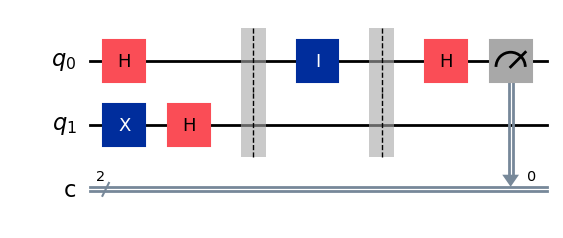

In [63]:
def oracle_f3(circuit, x, y):
    circuit.id(x)

djCircuit = QuantumCircuit(2, 2)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
djCircuit.h(0)

# Flip the second register and apply the Hadamard gate.
djCircuit.x(1)
djCircuit.h(1)
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

oracle_f3(djCircuit, 0, 1)
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

djCircuit.h(0)

# Measurement
djCircuit.measure(0, 0)
djCircuit.draw('mpl')

f(x) is constant


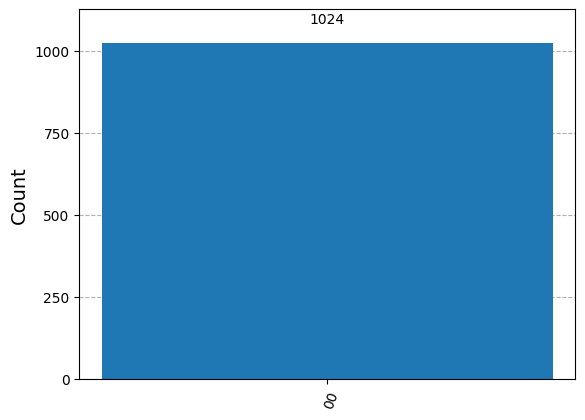

In [71]:
simulator = QasmSimulator()

compiled_circuit = transpile(djCircuit, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts()

if list(counts.keys())[0] == '00':
    print("f(x) is constant")
else:
    print("f(x) is balanced")
    
#print(list(counts.keys()))
plot_histogram(counts)

### 문제 2: "2비트 QFT 계산기"
```python
# 2큐비트 양자 푸리에 변환 계산기를 구현하세요.

# 요구사항:
# 1. 다음 입력 상태들에 대해 QFT 수행:
#    - |00⟩
#    - |10⟩
#    - (|00⟩ + |10⟩)/√2
# 2. 각 경우에 대해:
#    - 이론적 결과값 계산
#    - 실제 구현 결과와 비교
#    - 상대 위상 관계 분석
# 3. 역변환(IQFT)을 적용하여 원래 상태 복원 검증
```

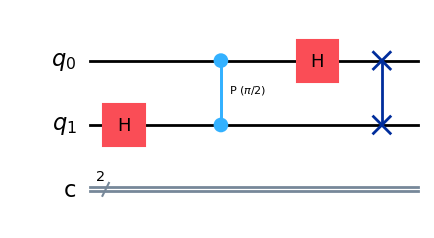

In [73]:
qc = QuantumCircuit(2, 2)

qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0, 1)
qc.draw('mpl')

